In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("/home/mathematics/Desktop/dataset/tvmarketing.csv")
df.head()

,Advertisments,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [14]:
df.isnull().sum()

Advertisments    0
Sales            0
dtype: int64

In [15]:
df.describe()

,Advertisments,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


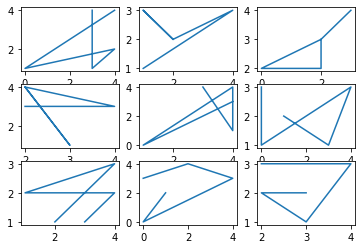

In [16]:
fig, ax = plt.subplots(3,3)

for row in ax:
    for col in row:
        col.plot(np.random.randint(0,5,5), np.random.randint(0,5,5))

plt.show()

<AxesSubplot:>

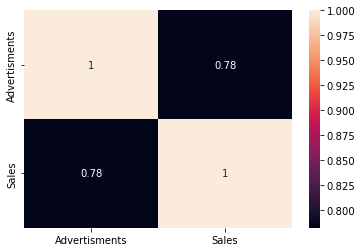

In [6]:
sns.heatmap(df.corr(),annot=True) 

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
target_y = df['Sales']
features_x = df.drop('Sales', axis = 1, inplace = False)
features_x.head()

,Advertisments
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [19]:
train_x, test_x, train_y, test_y = train_test_split(features_x,target_y,test_size = 0.2)

In [20]:
test_x.shape

(40, 1)

In [22]:
test_y.shape

(40,)

In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_x,train_y)

LinearRegression()

In [9]:
print('Co-eficints:',model.coef_)
print('Intercept: ',model.intercept_)

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [26]:
predicted_y = model.predict(test_x)

In [27]:
predicted_y.shape

(40,)

In [28]:
from sklearn.metrics import r2_score
print("accuracy: ",r2_score(test_y,predicted_y))

accuracy:  0.6152475407879268


In [29]:
import pickle
pickle_out = open("LinearRegr_windows_new.pkl","wb")
pickle.dump(model, pickle_out)
pickle_out.close()

In [30]:
pwd

'/home/mathematics/Desktop/KMSFDPPROJECT'

In [32]:
#Loading the required libraries
import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

#Calling the model we saved above:

pickle_in = open('linearRegr_windows_new.pkl', 'rb')
classifier = pickle.load(pickle_in)
#Creating the UI for the application:


st.title('Sales Prediction Using Linear Regression')
name = st.text_input("Name:")
Advertisments= st.number_input("No. of Advertisments:")
submit = st.button('Predict')
if submit:
    prediction = classifier.predict([[Advertisments]])
    st.write('Possible Sales will be ',prediction)

ImportError: cannot import name 'TypeAliasType' from 'typing_extensions' (/home/mathematics/anaconda3/lib/python3.9/site-packages/typing_extensions.py)